# Analýza datasetu CHARS74K
CHARS74K (Dataset of CHARacterS - 74 000) je dataset obsahujúci číslice a písmená. Vznikol ako reakcia na potrebu klasifikovania číslic, písmen a symbolov pomocou interiérových a exteriérových kamier. Je využívaný pri trénovaní obraz-spracujúcich systémov, pričom jadrom tohto využitia je strojové učenie. Jeho autormi sú Teofilo E. de Campos-Xerox Research Centre Europe, Bodla Rakesh Babu-International Institute of Information Technology a Manik Varma-Microsoft Research.
#### <span style="color: blue;">Štruktúra:</span>
Dataset je celkovo tvorený 6 datasemti tvorenými číslicami a písmenami z anglického a kannadčieho jazyka napísaných rukou alebo zaznamenanými pomcou rôznych interiérových a exteriérových kamier:
* English Img
* __English Hnd__
* English Fnt
* Kannada Img
* Kannada Hnd
* Kannada Fnt

V tejto konkrétnej analýze sme sa zamerali na podmnožinu CHARS74K English Hnd.
Podmnožina je tvorená 550 vzorkami rukou písaných číslic.
#### <span style="color: blue;">Formát vzorky:</span>
Vzorky číslic datasetu majú veľosť 1200x900 pixelov a naturálny farebný formár RGB. Hodnoty pixelov však nadobúdajú len hodnoty 0 alebo 1. 
#### <span style="color: blue;">Pôvod:</span>
Dataset CHARS74K English Hnd vznikol v roku 2009 zaznamenaním 3 430 číslic a písmen od 55 respondentov pomocou grafického tabletu. Z tohto počtu celkovo 550 vzoriek reprezentuje arabské číslice.

---
## Importovanie modulov:

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

#príkaz umožnujúci embedded inline kompiláciu modulu matplotlib
%matplotlib inline

---
## Štruktúra datasetu:
Dataset CHARS74K tvorí 10 podpriečinkov pre každú triedu, ktoré obsahujú .png súbory reprezentujúce vzorky číslic v rôznych veľkostiach.

In [2]:
chars74k_path = "/Users/filipeno1/Downloads/Bakalarska_praca/Datasety/CHARS74K"
for root, dirs, files in os.walk(chars74k_path):
        level = root.replace(chars74k_path, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)

CHARS74K/
    Sample002/
    Sample005/
    Sample004/
    Sample003/
    Sample010/
    Sample008/
    Sample006/
    Sample001/
    Sample007/
    Sample009/


---
## Vizualizácia vzoriek dát (číslic):
Do premennej __img_1__ sme priamo načítali obrázok číslice z konkrétneho podpriečinka.

In [3]:
image_list = os.listdir("/Users/filipeno1/Downloads/Bakalarska_praca/Datasety/CHARS74K/Sample007")
img_1 = mpimg.imread(f"/Users/filipeno1/Downloads/Bakalarska_praca/Datasety/CHARS74K/Sample007/{image_list[7]}")

print(f"Label: Sample007")
print(img_1)

Label: Sample007
[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 ...

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]


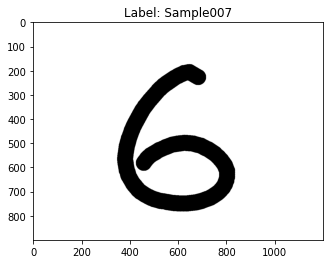

In [4]:
#vizualizácia bez použitia dodatočného filtru
plt.title(f"Label: Sample007")
plt.imshow(img_1)

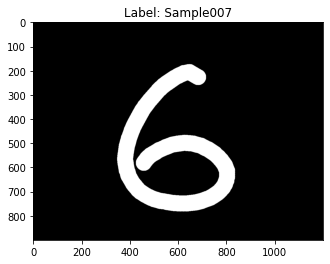

In [5]:
#vizualizácia s použitím čiernobieleho filtra "gray" a inverzie
plt.title(f"Label: Sample007")
plt.imshow(1-img_1[:,:,1], cmap='gray', vmin = 0, vmax = 1)

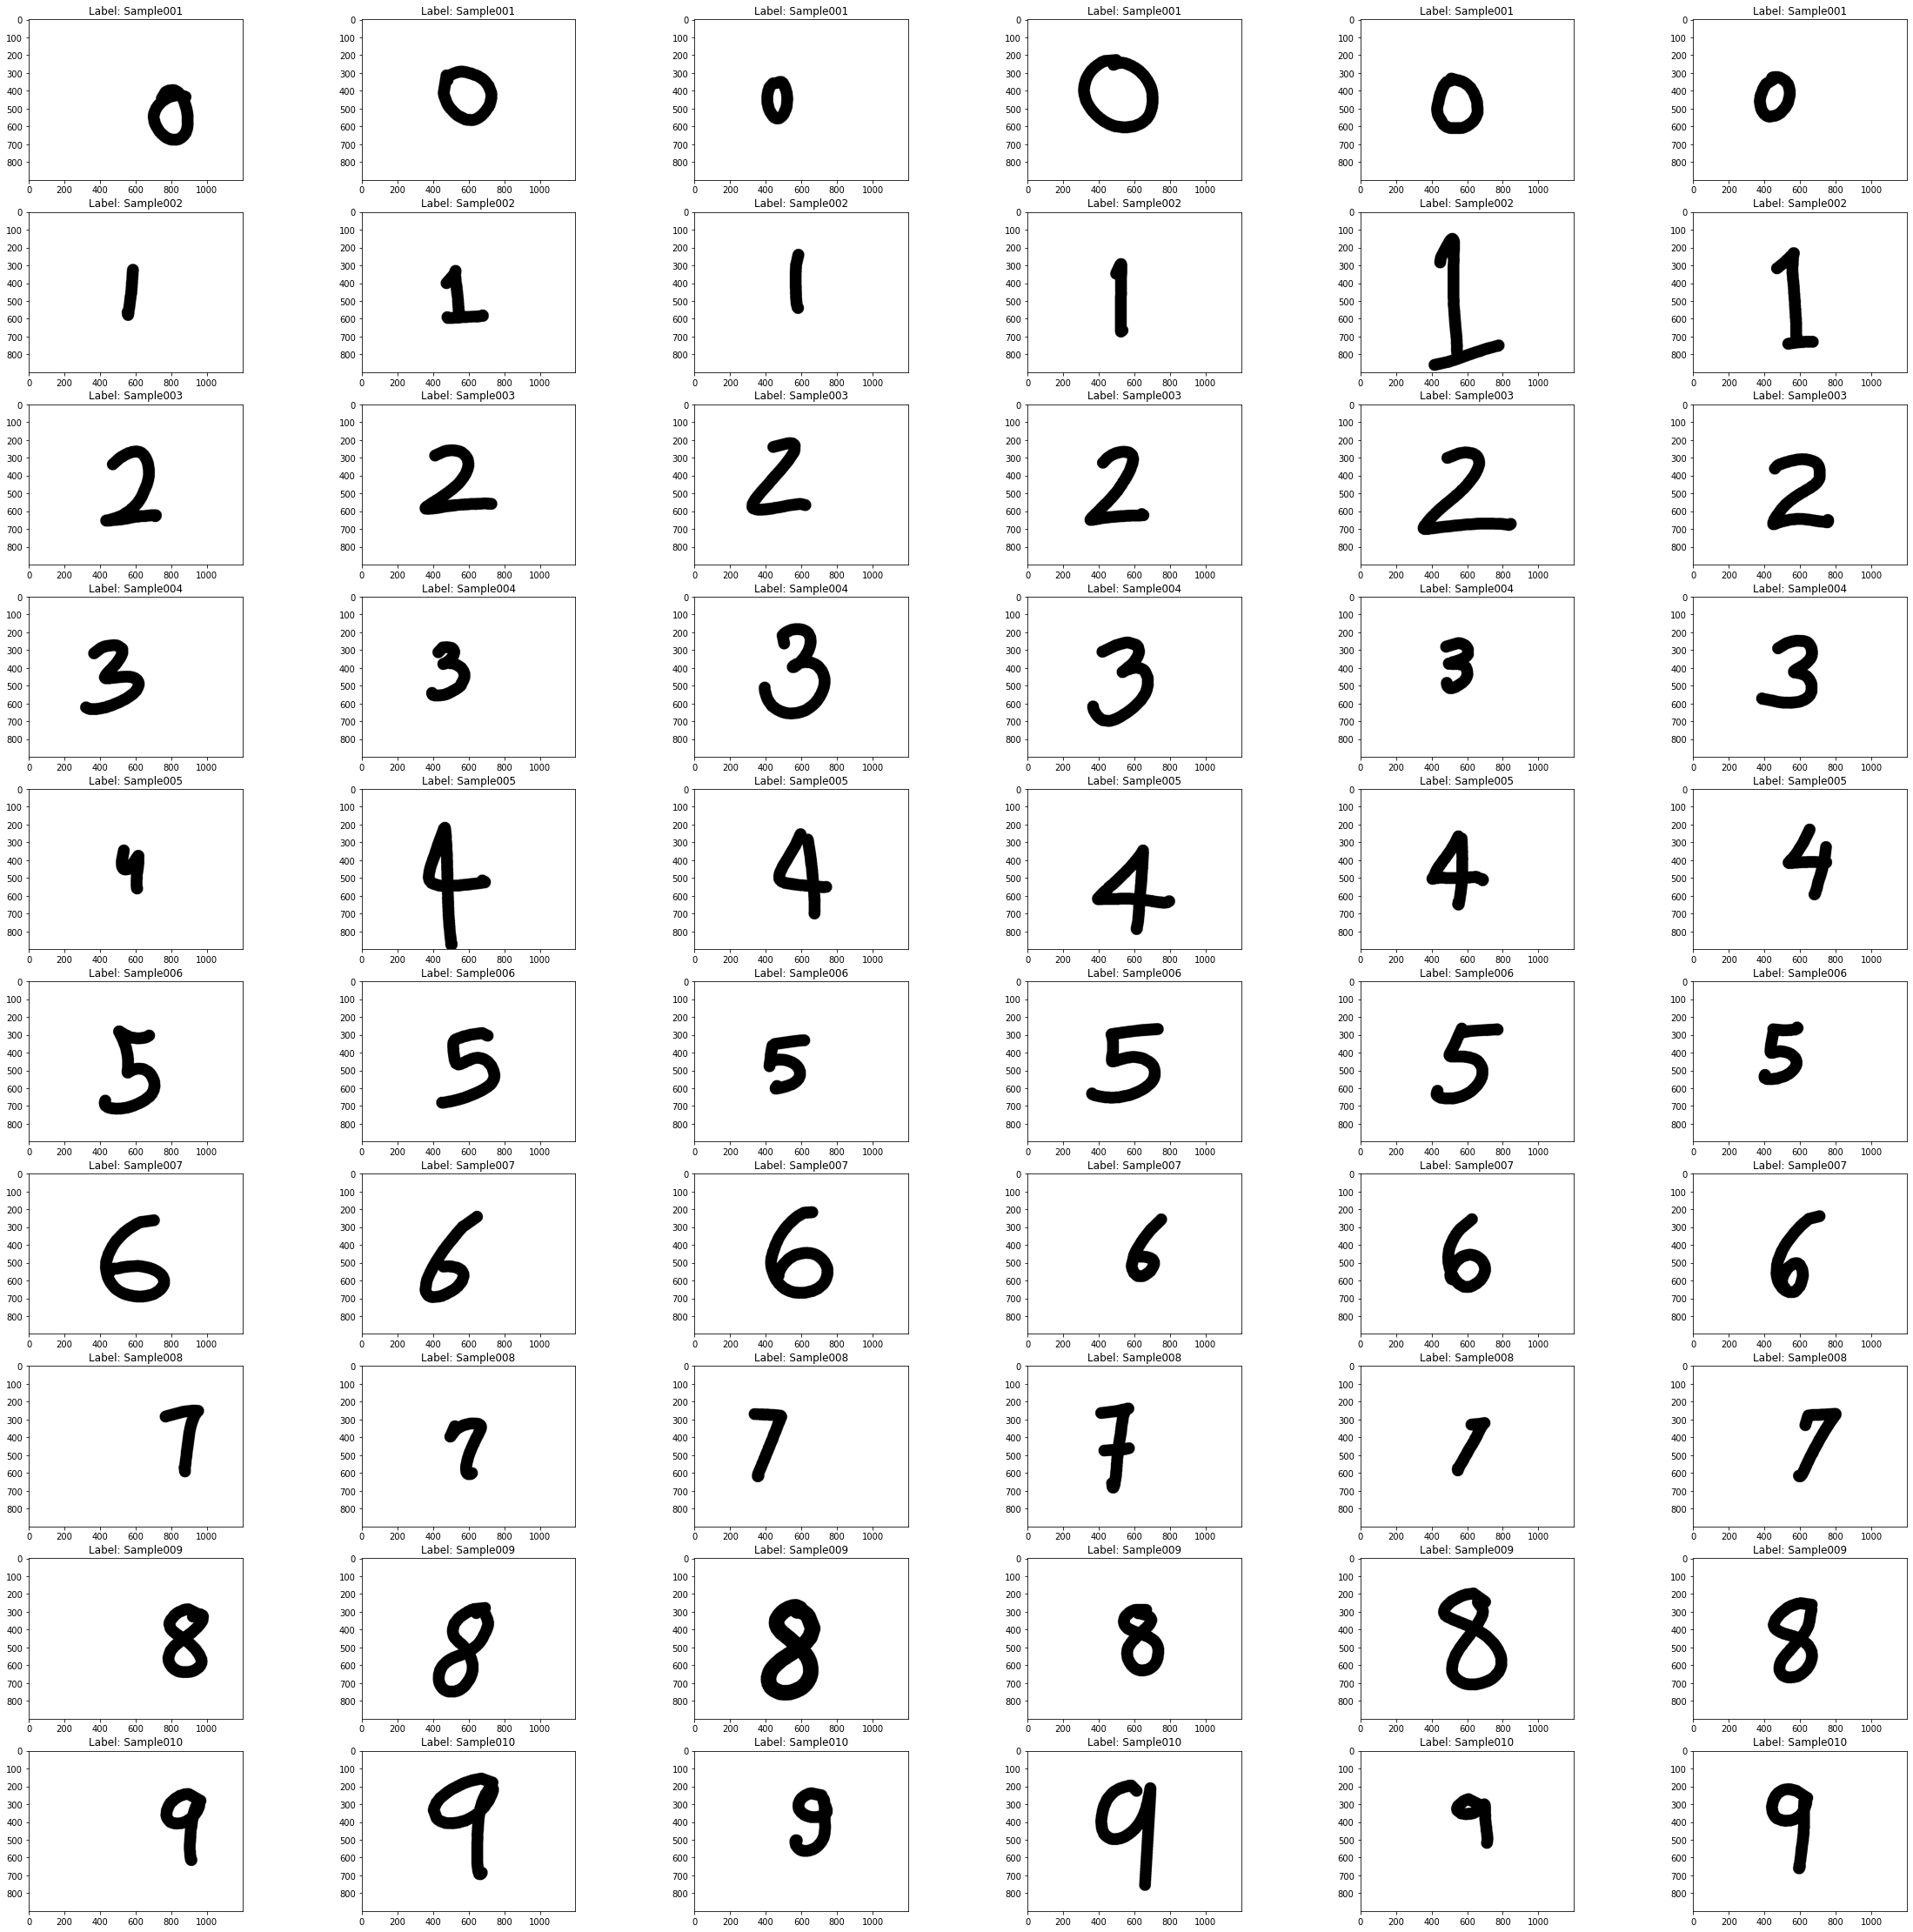

In [6]:
#vizualizácia v mriežke bez použitia dodatočného filtru
f, axarr = plt.subplots(10, 6, figsize=(40,40))

for i in range(1, 11):
    counter = 1
    for j in range(0, 6):
        axarr[i-1, j].set_title(f"Label: Sample{i:03d}")
        tmp_image_list = os.listdir(f"/Users/filipeno1/Downloads/Bakalarska_praca/Datasety/CHARS74K/Sample{i:03d}")
        tmp_img = mpimg.imread(f"/Users/filipeno1/Downloads/Bakalarska_praca/Datasety/CHARS74K/Sample{i:03d}/{tmp_image_list[counter]}")
        axarr[i-1, j].imshow(tmp_img)
        counter *= 2

---
## Rozbor datasetu:
Pri datasetoch určených na použitie pri strojovom učení je dôležitá ich vhodná robustnosť a škálovanie, ktoré dokážu pri vhodnej optimalizácii daného systému (neurónová sieť...) maximalizovať úspešnosť klasifikácie a minimalizovať trénovaci čas.
<br>Dataset CHARS74K vo svojej jedinnej sade obsahuje absolútne rovnomerný počet vzoriek.

Text(0.5, 0.98, 'Početnosť vzoriek číslic v datasete')

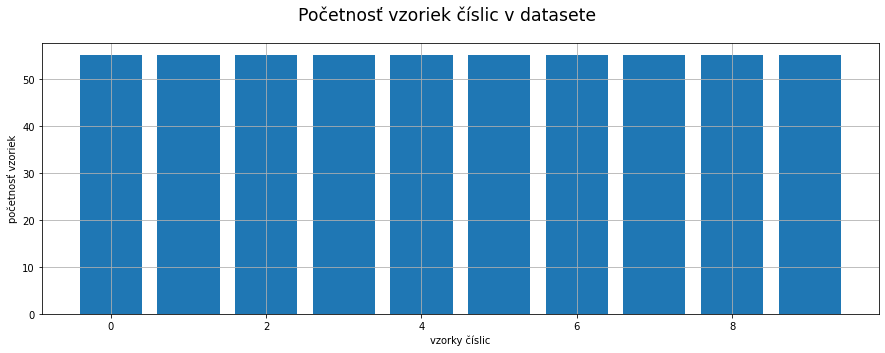

In [7]:
#vytvorenie polí na zobrazenie histogramu(stĺpcového grafu)
labels = []
counts = []
for i in range(1, 11):
    labels.append(i-1)
    tmp_image_list = os.listdir(f"/Users/filipeno1/Downloads/Bakalarska_praca/Datasety/CHARS74K/Sample{i:03d}")
    counts.append(len(tmp_image_list))  

#zobrazenie histogramu(stĺpcového grafu) zo zvolených údajov
plt.figure(figsize=(15, 5))
plt.grid()
plt.bar(labels, counts)
#nastavenie pomenovania x-ovej osi grafu
plt.xlabel("vzorky číslic")
#nastavenie pomenovania y-ovej osi grafu
plt.ylabel("početnosť vzoriek")
#nastavenie názvu grafu
plt.suptitle("Početnosť vzoriek číslic v datasete", ha="center", fontsize="xx-large")

In [8]:
print("Početnosť vzoriek číslic v datasete:")
sum_of_count = 0
for i in range(0,10):
    count = counts[i]
    sum_of_count += count
    print(f" - počet vzoriek čísla {i}: {count}")
avrg = sum_of_count/(i+1)
print(f"\nPriemerný počet vzoriek: {avrg}")

Početnosť vzoriek číslic v datasete:
 - počet vzoriek čísla 0: 55
 - počet vzoriek čísla 1: 55
 - počet vzoriek čísla 2: 55
 - počet vzoriek čísla 3: 55
 - počet vzoriek čísla 4: 55
 - počet vzoriek čísla 5: 55
 - počet vzoriek čísla 6: 55
 - počet vzoriek čísla 7: 55
 - počet vzoriek čísla 8: 55
 - počet vzoriek čísla 9: 55

Priemerný počet vzoriek: 55.0


---
## Zdroje:

T. E. de Campos, B. R. Babu and M. Varma. Character recognition in natural images. In Proceedings of the International Conference on Computer Vision Theory and Applications (VISAPP), Lisbon, Portugal, February 2009.